<a href="https://colab.research.google.com/github/DavidJimenez10/CV-Deep-Learning/blob/main/Examen_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOMALIAS EN MNIST

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten, Dense, Reshape,Conv2D,MaxPooling2D,Conv2DTranspose

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar los datos
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

train_data= np.reshape(x_train, (len(x_train), 28, 28, 1))
test_data= np.reshape(x_test, (len(x_test), 28, 28, 1))
print (train_data.shape)
print (test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
noisy_array = train_data + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=train_data.shape)
noisy_train_data=np.clip(noisy_array, 0.0, 1.0)

In [ ]:
noisy_array = test_data + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
noisy_test_data=np.clip(noisy_array, 0.0, 1.0)

In [ ]:
sample_noisy_test = noisy_test_data[1000:1100]
sample_test_data = test_data[1000:1100]
final_test = np.vstack((sample_test_data,sample_noisy_test))
final_test.shape

(200, 28, 28, 1)

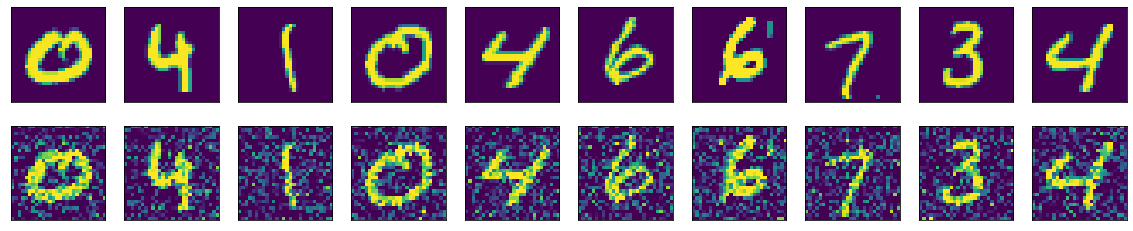

In [ ]:
indices = np.random.randint(len(train_data), size=10)
images1 = train_data[indices, :]
images2 = noisy_train_data[indices, :]
plt.figure(figsize=(20, 4))
for i, (images1, images2) in enumerate(zip(images1, images2)):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(images1.reshape(28, 28),)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, 10, i + 1 + 10)
  plt.imshow(images2.reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()



In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
encoder = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)
encoder = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(encoder)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)

# Decoder
decoder = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(encoder)
decoder = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoder)
decoder = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoder)

# Autoencoder
autoencoder = Model(input, decoder)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       2320  

In [ ]:
history = autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0658 - val_loss: 0.1389
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0657 - val_loss: 0.1378
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0656 - val_loss: 0.1413
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0655 - val_loss: 0.1386
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.1414
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.1401
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0653 - val_loss: 0.1408
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0652 - val_loss: 0.1411
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0652 - val_loss: 0.1379
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0651 - val_loss: 0.1428

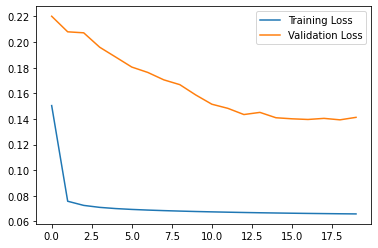

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
reconstructions = autoencoder.predict(noisy_test_data)

In [ ]:
reconstructions[0].shape

TensorShape([28, 28, 1])

In [ ]:
train_data[0].shape

(28, 28, 1)

In [ ]:
diff = test_data[0] - reconstructions[0].numpy()

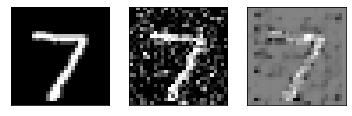

In [ ]:
ax = plt.subplot(1, 3, 1)
plt.imshow(test_data[0].reshape(28, 28),cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 3, 2)
plt.imshow(noisy_test_data[0].reshape(28, 28),cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 3, 3)
plt.imshow(diff.reshape(28, 28),cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

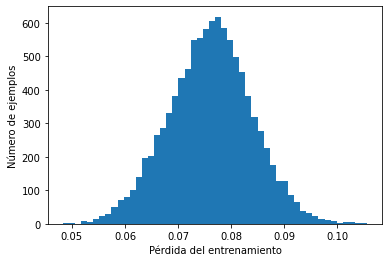

In [ ]:
train_loss = tf.keras.losses.mae(reconstructions, test_data)
mean_loss = np.mean(np.mean(train_loss.numpy(),axis=2),axis=1)
plt.hist(mean_loss, bins=50)
plt.xlabel('Pérdida del entrenamiento')
plt.ylabel('Número de ejemplos')
plt.show()

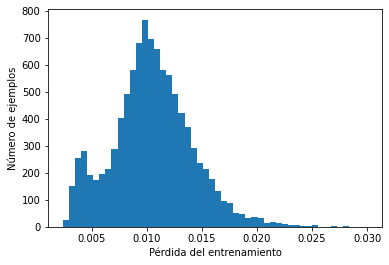

In [ ]:
reconstructions = autoencoder(test_data)
train_loss = tf.keras.losses.mae(reconstructions, test_data)
mean_loss = np.mean(np.mean(train_loss.numpy(),axis=2),axis=1)
plt.hist(mean_loss, bins=50)
plt.xlabel('Pérdida del entrenamiento')
plt.ylabel('Número de ejemplos')
plt.show()

In [ ]:
diff = test_data[0] - reconstructions[0].numpy()

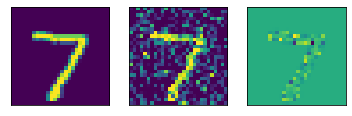

In [ ]:
ax = plt.subplot(1, 3, 1)
plt.imshow(test_data[0].reshape(28, 28),)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 3, 2)
plt.imshow(noisy_test_data[0].reshape(28, 28))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 3, 3)
plt.imshow(diff.reshape(28, 28))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [ ]:
threshold = np.mean(mean_loss) - 2*np.std(mean_loss)
#threshold = 0.03
print("Umbral: ", threshold)

Umbral:  0.06048318278044462


In [ ]:
reconstructions = autoencoder.predict(noisy_test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)
loss = np.mean(np.mean(loss.numpy(),axis=2),axis=1)
predictions= tf.math.greater(loss, threshold)

In [ ]:
labels_anom = np.ones(100)
labels_norm = np.zeros(100)
labels = np.hstack((labels_anom,labels_norm))
labels.shape

(200,)

In [ ]:
print("Accuracy = {}".format(accuracy_score(np.ones(10000), predictions)))
print("Precision = {}".format(precision_score(np.ones(10000), predictions)))
print("Recall = {}".format(recall_score(np.ones(10000), predictions)))

Accuracy = 0.9752
Precision = 1.0
Recall = 0.9752


#SERIE TIEMPO EN VENTAS

In [ ]:
from math import sqrt
from numpy import array,mean,std
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM,TimeDistributed


In [ ]:
url='https://github.com/jbrownlee/Datasets/blob/d20fcb6402ae34e653d4513b00f39257bb37ed7f/monthly-car-sales.csv?raw=true'
serie = pd.read_csv(url, header=0,index_col=0)

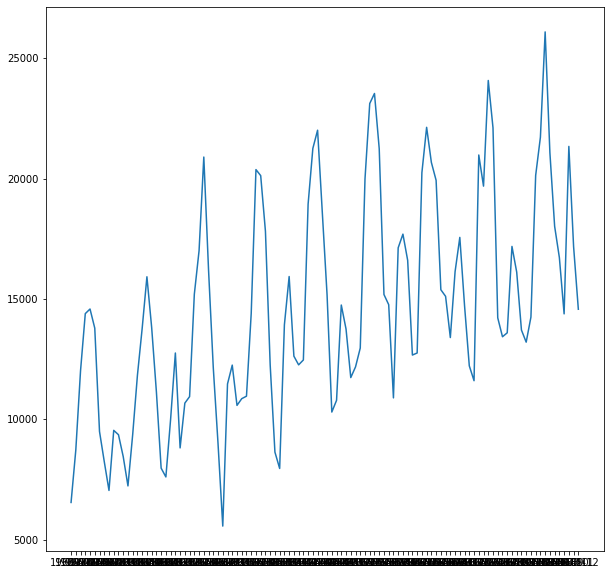

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(serie)
plt.show()

In [ ]:
data = serie.values
n_test = 12
train, test=data[:-n_test], data[-n_test:]

In [ ]:
def series_to_supervised(data, n_in, n_out=1):
  df = pd.DataFrame(data)
  cols = list()
  # serie de entrada: (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
  # serie de predicción: (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
  # concatenar datos
  agg = pd.concat(cols, axis=1)
  # quitar valores vacíos
  agg.dropna(inplace=True)
  return agg.values

In [ ]:
train_x, train_y = train_data[:, :-1], train_data[:, -1]

In [ ]:
def model_predict(model, input_test, n_input):
  x_input = np.array(input_test[-n_input:]).reshape((1, n_input, 1))
  yhat = model.predict(x_input, verbose=0)
  return yhat[0]

In [ ]:
n_test = 12
train, test=data[:-n_test], data[-n_test:]

In [ ]:
n_input, n_filters, n_kernel, n_epochs, n_batch=[36, 256, 3, 100, 100]

In [ ]:
train_data=series_to_supervised(train, n_input)
train_x, train_y = train_data[:, :-1], train_data[:, -1]

In [ ]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))

In [ ]:
model = Sequential()
model.add(Conv1D(n_input, n_kernel, activation='relu', input_shape=(n_input, 1)))
model.add(Conv1D(n_input, n_kernel, activation='relu'))
model.add(Conv1D(n_input, n_kernel, activation='relu'))
model.add(Conv1D(n_input, n_kernel, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_132 (Conv1D)         (None, 34, 36)            144       
                                                                 
 conv1d_133 (Conv1D)         (None, 32, 36)            3924      
                                                                 
 conv1d_134 (Conv1D)         (None, 30, 36)            3924      
                                                                 
 conv1d_135 (Conv1D)         (None, 28, 36)            3924      
                                                                 
 max_pooling1d_48 (MaxPoolin  (None, 14, 36)           0         
 g1D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 504)               0         
                                                     

In [ ]:
model = Sequential()
model.add(Conv1D(64, n_kernel, activation='relu', input_shape=(n_input, 1)))
model.add(Conv1D(64, n_kernel, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(1))
model.compile(loss='mse', optimizer='Adamax')
model.summary()

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_165 (Conv1D)         (None, 34, 64)            256       
                                                                 
 conv1d_166 (Conv1D)         (None, 32, 64)            12352     
                                                                 
 max_pooling1d_64 (MaxPoolin  (None, 16, 64)           0         
 g1D)                                                            
                                                                 
 flatten_56 (Flatten)        (None, 1024)              0         
                                                                 
 dense_158 (Dense)           (None, 256)               262400    
                                                                 
 dense_159 (Dense)           (None, 1)                 257       
                                                     

In [ ]:
model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch)

Epoch 1/100
1/1 [==============================] - 0s 395ms/step - loss: 368726080.0000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 19851848.0000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 105014736.0000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 108179408.0000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 56128968.0000
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 23217898.0000
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 17520740.0000
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 24773058.0000
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 33634296.0000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 38998420.0000
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 39724232.0000
Epoch 12/100
1/1 [==============================] - 0

In [ ]:
input_test = [x for x in train]
predictions=[]
for i in range(len(test)):
  yhat =  model_predict(model, input_test, n_input)
  predictions.append(yhat)
  input_test.append(test[i])

error = sqrt(mean_squared_error(test, predictions))
print('%.3f RMSE' % error)

1595.199 RMSE


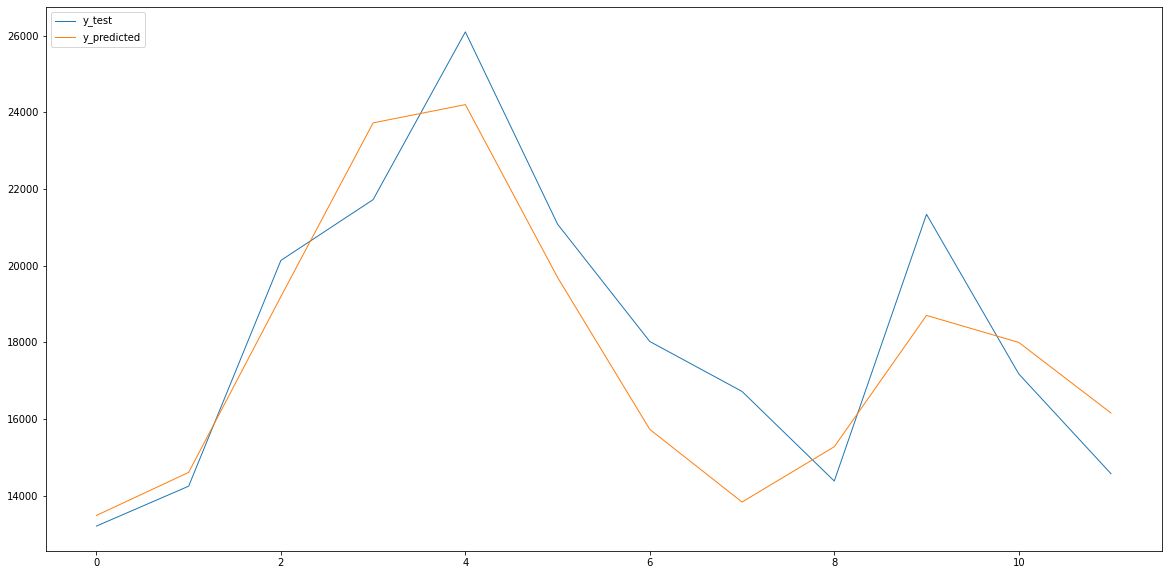

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test, label='y_test',linewidth=1)
plt.plot(predictions, label='y_predicted',linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Para la diferencia por año, n_diff=12
def difference(data, n_diff):
  return [data[i] - data[i - n_diff] for i in range(n_diff, len(data))]

In [ ]:
def model_predict(model, history, n_input):
  # preparar datos
  correction = 0.0
  if n_diff > 0:
    correction = history[-n_diff]
    history = difference(history, n_diff)
  x_input = array(history[-n_input:]).reshape((1, n_input, 1))
  # forecast
  yhat = model.predict(x_input, verbose=0)
  return correction + yhat[0]

In [ ]:
n_input, n_nodes, n_epochs, n_batch, n_diff, n_features, n_seq = [12, 40, 100, 100, 12, 1, 1]

In [ ]:
if n_diff > 0:
  train = difference(train, n_diff)
data = series_to_supervised(train, n_input)
train_x, train_y = data[:, :-1], data[:, -1]
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
#train_x = train_x.reshape((train_x.shape[0], n_seq, n_diff, n_features))

In [ ]:
model = Sequential()

# model.add(TimeDistributed(Conv1D(64, 1, activation='relu'), input_shape=(None, n_diff,n_features)))
# model.add(TimeDistributed(MaxPooling1D()))
# model.add(TimeDistributed(Flatten()))
# model.add(LSTM(n_nodes, activation='relu'))
# model.add(Dense(1))


model.add(LSTM(150, activation='relu', input_shape=(n_input, 1),return_sequences=True))
model.add(LSTM(100, activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 36, 150)           91200     
                                                                 
 lstm_47 (LSTM)              (None, 100)               100400    
                                                                 
 dense_85 (Dense)            (None, 1)                 101       
                                                                 
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1557285504.0000
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 1543045632.0000
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 1544198656.0000
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 1567538816.0000
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 1543872128.0000
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 1526950272.0000
Epoch 7/100
1/1 [==============================] - 0s 45ms/step - loss: 1539434880.0000
Epoch 8/100
1/1 [==============================] - 0s 43ms/step - loss: 1527050880.0000
Epoch 9/100
1/1 [==============================] - 0s 59ms/step - loss: 1508660224.0000
Epoch 10/100
1/1 [==============================] - 0s 46ms/step - loss: 1533192320.0000
Epoch 11/100
1/1 [==============================] - 0s 56ms/step - loss: 1497600000.0000
Epoch 12/100
1/1 [==============

In [ ]:
input_test = [x for x in train]
predictions=[]
for i in range(len(test)):
  x_input = array(input_test[-n_input:]).reshape((1, n_input, 1))
  yhat = model.predict(x_input, verbose=0)
  predictions.append(yhat[0])
  input_test.append(test[i])
error = sqrt(mean_squared_error(test, predictions))
print('%.3f RMSE' % error)

14099.635 RMSE


In [ ]:
input_test = [x for x in train]
predictions=[]
for i in range(len(test)):
  yhat =  model_predict(model, input_test, n_input)
  predictions.append(yhat)
  input_test.append(test[i])

error = sqrt(mean_squared_error(test, predictions))
print('%.3f RMSE' % error)

39885.607 RMSE


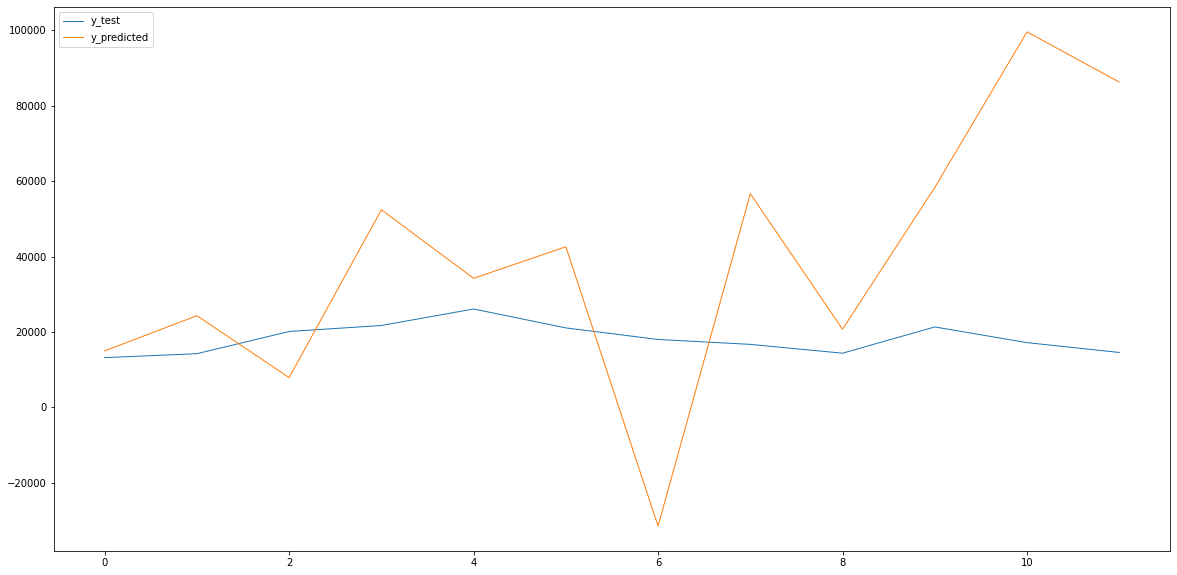

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test, label='y_test',linewidth=1)
plt.plot(predictions, label='y_predicted',linewidth=1)
plt.legend(loc='upper left')
plt.show()